## Simple Comparative Analysis of Hamiltonians with Combinatorial Obfuscation

The notebook compares the behavior of a Hamiltonian obtained from the HamLib collection with a scaled up version encoded into a larger number of qubits using combinatorial obfuscation.


In [1]:
import numpy as np
import os, json
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp

### Load HamLib Hamiltonian (from Cached JSON file)
Load from a cached json file containing the HamLib formatted sparse Pauli terms.

In [2]:
num_qubits = 4

# BH 4 qubits
orig_hamiltonian_filename = "bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4.json"

# BH expanded to 8 qubits
co_hamiltonian_filename = "outFileGSsolver_n8_k8_m39_id3418257666.json" 
#co_hamiltonian_filename = "outFileGSsolver_n8_k6_m1493_id5408921716.json"    # second version, 

# load original hamiltonian
filename = orig_hamiltonian_filename
original_hamiltonian = None
if os.path.exists(filename) and os.path.isfile(filename):
    with open(filename, 'r') as f:
        try:
            original_hamiltonian = json.load(f) 
            # round the coefficients after reading from text file
            for i, term in enumerate(original_hamiltonian):
                original_hamiltonian[i] = (term[0], round(np.real(term[1]), 5))
                
        except json.JSONDecodeError as e:
            print(f"ERROR: Failed to parse JSON file {filename}\n{e}")
        except:
            print(f"ERROR: cannot load file {f}")

print(f"... original Hamiltonian at {num_qubits} qubits = \n{original_hamiltonian}\n")


... original Hamiltonian at 4 qubits = 
[({}, 20.0), ({'0': 'X', '1': 'Z', '2': 'X'}, -0.25), ({'0': 'X', '1': 'Z', '2': 'X', '3': 'Z'}, 0.06699), ({'0': 'X', '1': 'Z', '2': 'Z', '3': 'X'}, 0.12941), ({'0': 'X', '1': 'Z', '3': 'X'}, -0.12941), ({'0': 'X', '2': 'X'}, 0.93301), ({'0': 'X', '2': 'X', '3': 'Z'}, -0.25), ({'0': 'X', '2': 'Z', '3': 'X'}, -0.48296), ({'0': 'X', '3': 'X'}, 0.48296), ({'0': 'Y', '1': 'Z', '2': 'Y'}, -0.25), ({'0': 'Y', '1': 'Z', '2': 'Y', '3': 'Z'}, 0.93301), ({'0': 'Y', '1': 'Z', '2': 'Z', '3': 'Y'}, -0.48296), ({'0': 'Y', '1': 'Z', '3': 'Y'}, 0.48296), ({'0': 'Y', '2': 'Y'}, 0.06699), ({'0': 'Y', '2': 'Y', '3': 'Z'}, -0.25), ({'0': 'Y', '2': 'Z', '3': 'Y'}, 0.12941), ({'0': 'Y', '3': 'Y'}, -0.12941), ({'0': 'Z'}, 5.0), ({'0': 'Z', '1': 'X', '2': 'X'}, -0.48296), ({'0': 'Z', '1': 'X', '2': 'X', '3': 'Z'}, 0.12941), ({'0': 'Z', '1': 'X', '2': 'Z', '3': 'X'}, 0.25), ({'0': 'Z', '1': 'X', '3': 'X'}, -0.25), ({'0': 'Z', '1': 'Y', '2': 'Y'}, 0.12941), ({'0': 'Z', '

### Load Obfuscated Hamiltonian at Larger Qubit Width
Here we read a larger Hamiltonian that is created from the original using combinatorial obfuscation. The Hamiltonian was manually created and retrieved from another JSON file.

In [3]:
co_num_qubits = 8

# Bose-Hubbard Hamiltonian expanded to 8 qubits
co_hamiltonian_filename = "outFileGSsolver_n8_k8_m39_id3418257666.json" 
#co_hamiltonian_filename = "outFileGSsolver_n8_k6_m1493_id5408921716.json"    # second version, using different params

# load obsuscated hamiltonian
filename = co_hamiltonian_filename
co_hamiltonian = None
if os.path.exists(filename) and os.path.isfile(filename):
    with open(filename, 'r') as f:
        try:
            co_data = json.load(f)

            co_hamiltonian = co_data[1]["Hamiltonian"]
            
            # round the coefficients after reading from text representation
            for term in co_hamiltonian:
                term[0] = round(term[0], 5)
        
        except json.JSONDecodeError as e:
            print(f"ERROR: Failed to parse JSON file {filename}\n{e}")
        except:
            print(f"ERROR: cannot load file {f}")

print(f"... obfuscated Hamiltonian at {co_num_qubits} qubits = \n{co_hamiltonian}\n")


... obfuscated Hamiltonian at 8 qubits = 
[[20.0, [0, 0, 0, 0, 0, 0, 0, 0]], [0.25, [3, 3, 1, 2, 1, 1, 1, 1]], [0.06699, [0, 3, 1, 0, 3, 2, 0, 0]], [0.12941, [2, 3, 3, 1, 0, 3, 1, 2]], [-0.12941, [2, 3, 0, 1, 0, 3, 1, 2]], [0.93301, [0, 3, 2, 1, 1, 0, 0, 0]], [-0.25, [3, 3, 2, 3, 3, 3, 1, 1]], [0.48296, [1, 3, 0, 2, 0, 2, 0, 3]], [-0.48296, [1, 3, 3, 2, 0, 2, 0, 3]], [-0.25, [1, 3, 2, 2, 3, 3, 2, 2]], [-0.93301, [2, 3, 2, 0, 1, 0, 3, 3]], [-0.48296, [3, 3, 3, 3, 0, 2, 3, 0]], [0.48296, [3, 3, 0, 3, 0, 2, 3, 0]], [-0.06699, [2, 3, 1, 1, 3, 2, 3, 3]], [-0.25, [1, 3, 1, 3, 1, 1, 2, 2]], [-0.12941, [0, 3, 0, 0, 0, 3, 2, 1]], [0.12941, [0, 3, 3, 0, 0, 3, 2, 1]], [-5.0, [2, 0, 0, 0, 2, 2, 3, 3]], [-0.48296, [3, 2, 1, 1, 2, 2, 3, 2]], [0.12941, [0, 2, 1, 3, 0, 1, 2, 3]], [0.25, [2, 2, 3, 2, 3, 0, 3, 1]], [-0.25, [2, 2, 0, 2, 3, 0, 3, 1]], [-0.12941, [0, 2, 1, 2, 2, 3, 2, 3]], [-0.48296, [3, 2, 1, 0, 0, 0, 3, 2]], [-0.25, [2, 2, 0, 3, 1, 2, 3, 1]], [0.25, [2, 2, 3, 3, 1, 2, 3, 1]], [5.0, [1, 0

### Function to Convert Obfuscated Format to HamLib format
The CO Hamiltonian needs to be converted to the same form as the HamLib Hamiltonians.

In [4]:
# Function to convert the CO format to HamLib format.
def convert_to_hamlib_format(terms: list):

    # convert all the terms to HamLib format
    new_terms = []
    for coeff, pauli_codes in terms:
        pauli_dict = {}

        # insert the Pauli character code for each qubit into the Pauli qubit dict
        for i, code in enumerate(pauli_codes):
            if code == 0:
                continue
            elif code == 1:
                q = "X"
            elif code ==2:
                q = 'Y'
            elif code == 3:
                q = 'Z'

            # it is necessary to insert it with an integer key for compatibility
            pauli_dict.update({int(i):q})

            # do this instead to reverse the Paulis (if we find this is necessary)
            # pauli_dict.update({int(num_qubits - i - 1):q})
            
        new_term = (pauli_dict, coeff)
        new_terms.append(new_term)

    return new_terms

# convert the CO formato to HamLib format
co_hamiltonian = convert_to_hamlib_format(co_hamiltonian)

print(f"... converted to HamLib format:")
print(co_hamiltonian)


... converted to HamLib format:
[({}, 20.0), ({0: 'Z', 1: 'Z', 2: 'X', 3: 'Y', 4: 'X', 5: 'X', 6: 'X', 7: 'X'}, 0.25), ({1: 'Z', 2: 'X', 4: 'Z', 5: 'Y'}, 0.06699), ({0: 'Y', 1: 'Z', 2: 'Z', 3: 'X', 5: 'Z', 6: 'X', 7: 'Y'}, 0.12941), ({0: 'Y', 1: 'Z', 3: 'X', 5: 'Z', 6: 'X', 7: 'Y'}, -0.12941), ({1: 'Z', 2: 'Y', 3: 'X', 4: 'X'}, 0.93301), ({0: 'Z', 1: 'Z', 2: 'Y', 3: 'Z', 4: 'Z', 5: 'Z', 6: 'X', 7: 'X'}, -0.25), ({0: 'X', 1: 'Z', 3: 'Y', 5: 'Y', 7: 'Z'}, 0.48296), ({0: 'X', 1: 'Z', 2: 'Z', 3: 'Y', 5: 'Y', 7: 'Z'}, -0.48296), ({0: 'X', 1: 'Z', 2: 'Y', 3: 'Y', 4: 'Z', 5: 'Z', 6: 'Y', 7: 'Y'}, -0.25), ({0: 'Y', 1: 'Z', 2: 'Y', 4: 'X', 6: 'Z', 7: 'Z'}, -0.93301), ({0: 'Z', 1: 'Z', 2: 'Z', 3: 'Z', 5: 'Y', 6: 'Z'}, -0.48296), ({0: 'Z', 1: 'Z', 3: 'Z', 5: 'Y', 6: 'Z'}, 0.48296), ({0: 'Y', 1: 'Z', 2: 'X', 3: 'X', 4: 'Z', 5: 'Y', 6: 'Z', 7: 'Z'}, -0.06699), ({0: 'X', 1: 'Z', 2: 'X', 3: 'Z', 4: 'X', 5: 'X', 6: 'Y', 7: 'Y'}, -0.25), ({1: 'Z', 5: 'Z', 6: 'Y', 7: 'X'}, -0.12941), ({1: 'Z', 2: 'Z', 5

### Function to convert HamLib format to Qiskit SparsePauliOp
To use Qiskit primitive functions, we need to conveert HamLib Hamiltonians to Qiskit format.

In [5]:
# Convert from HamLib format to Qiskit SparsePauliOp format

from qiskit.quantum_info import SparsePauliOp

def convert_sparse_pauli_terms_to_sparse_pauliop(sparse_pauli_terms, num_qubits):
    """
    Construct a SparsePauliOp from a list of sparse Pauli terms and the number of qubits.

    Args:
        sparse_pauli_terms (list): A list of tuples, where each tuple contains a dictionary representing the Pauli operators and 
                      their corresponding qubit indices, and a complex coefficient.
        num_qubits (int): The total number of qubits.

    Returns:
        SparsePauliOp: The Hamiltonian represented as a SparsePauliOp.
    """
    pauli_list = []
    
    for pauli_dict, coefficient in sparse_pauli_terms:
        label = ['I'] * num_qubits  # Start with identity on all qubits
        for qubit, pauli_op in pauli_dict.items():
            qubit = int(qubit)
            label[qubit] = pauli_op
        label = ''.join(label)
        pauli_list.append((label, coefficient))
    
    hamiltonian = SparsePauliOp.from_list(pauli_list, num_qubits=num_qubits)
    return hamiltonian
    

---
---
### Apply VQE to Find Ground State Energy of Both Hamiltonians

In [6]:
# These imports needed for VQE
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Estimator, StatevectorEstimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA

# Define an ansatz for initializing the quantum state
def get_ansatz(num_qubits, params):
    ansatz = EfficientSU2(num_qubits).decompose()
    ansatz.barrier()

    params_dict = {p: params[i] for i, p in enumerate(ansatz.parameters)}

    # Use assign_parameters instead of bind_parameters
    ansatz = ansatz.assign_parameters(params_dict)
    
    return ansatz
    

### Execute VQE to Find Lowest Energy - Original Hamiltonian

In [7]:
num_qubits = 4

# Create the ansatz
ansatz = EfficientSU2(num_qubits)

num_params = ansatz.num_parameters

# Generate initial parameters with correct length
initial_params = np.random.uniform(-np.pi, np.pi, ansatz.num_parameters)
print(f"... initial random parameters:\n{initial_params}")

# Get the ansatz circuit
ansatz_circuit = get_ansatz(num_qubits, initial_params)
#print(ansatz_circuit)


... initial random parameters:
[ 2.28369216  2.94636888 -0.86004056  1.99123474  0.45181026  1.87226213
  0.63513444 -2.5991164  -1.766938   -2.61452543 -0.47065989 -0.459508
 -2.31457787 -1.86324492 -0.6191492  -0.4277238   2.79726823  0.08900491
  0.48540856  0.31834081  0.01651771  1.12000634 -1.81105554 -0.94606378
  1.00888037 -2.03837077  0.33629522 -2.53676627 -0.42357676 -1.54959469
  2.09743917 -2.61921899]


In [9]:

original_hamiltonian_spo = convert_sparse_pauli_terms_to_sparse_pauliop(original_hamiltonian, num_qubits)

# Choose an optimizer (COBYLA is a good choice)
optimizer = COBYLA(maxiter=1000)

# Create an Estimator instance
estimator = Estimator()

# Instantiate VQE with required arguments
vqe = VQE(estimator, ansatz, optimizer, initial_point=initial_params)

# Compute the minimum eigenvalue
result = vqe.compute_minimum_eigenvalue(original_hamiltonian_spo)

# Print results
print(f"\nMinimum energy: {result.eigenvalue}")
print(f"\nOptimal parameters: {result.optimal_point}")


C:\Users\m\AppData\Local\Temp\ipykernel_25932\348717082.py:7: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()



Minimum energy: -0.9866601703406932

Optimal parameters: [ 3.14556394  1.7239971  -0.6829298   2.82006588 -0.03387137  3.46362122
  2.03010392 -1.86214758 -0.0291585  -3.10037668 -1.52422859 -0.57470333
 -2.57845218 -2.14006455  0.76508702 -0.79140666  3.14329654 -0.17588831
 -0.44859543 -0.05485321  0.59528765  0.17595464 -1.56221066 -1.00868377
  0.02856396 -1.01633934  1.55181245 -2.5045127  -1.33489142 -0.3191453
  1.47694721 -2.92013746]


---
### Execute VQE to Find Lowest Energy - Obfuscated Hamiltonian

In [10]:
num_qubits = co_num_qubits

# Create the ansatz
ansatz = EfficientSU2(num_qubits)

num_params = ansatz.num_parameters

# Generate initial parameters with correct length
initial_params = np.random.uniform(-np.pi, np.pi, ansatz.num_parameters)
print(f"... initial random parameters:\n{initial_params}")

# Get the ansatz circuit
ansatz_circuit = get_ansatz(num_qubits, initial_params)
#print(ansatz_circuit)


... initial random parameters:
[ 1.04445826  2.92257503 -1.604398   -1.19558839  0.93742671 -1.48474527
  1.29169608 -0.33261443  2.24150339  2.81140726  2.73002775  1.02710749
  0.44099359  2.25608892  2.53258149  1.06207413  0.02177894 -1.29353634
  2.34249032  0.74870286 -1.36790885 -2.56897828 -2.43657534  2.02391055
  0.72276522  1.91141026  1.70006031 -0.26466743  2.09924428 -0.44828785
  1.65009581 -2.48512983  0.37390905  1.00711117  0.49588423  2.76379082
 -1.23610926  0.83848116  0.62261985 -0.82854318  1.34047695 -1.23613835
 -1.29750369 -2.29927809 -0.813438   -2.7020132   2.73894158 -0.78639676
  0.1384521   1.49074001  0.1296551   0.36388263  2.84401747 -1.18399783
  3.1043619  -0.13278511 -2.81941342  2.73983722  0.711018   -2.01325321
  0.00652804 -0.07116295 -3.00383297  2.94587846]


In [12]:

co_hamiltonian_spo = convert_sparse_pauli_terms_to_sparse_pauliop(co_hamiltonian, co_num_qubits)

# Choose an optimizer (COBYLA is a good choice)
optimizer = COBYLA(maxiter=1000)

# Create an Estimator instance
estimator = Estimator()

# Instantiate VQE with required arguments
vqe = VQE(estimator, ansatz, optimizer, initial_point=initial_params)

# Compute the minimum eigenvalue
result = vqe.compute_minimum_eigenvalue(co_hamiltonian_spo)

# Print results
print("")
print(f"Minimum energy: {result.eigenvalue}")
print(f"Optimal parameters: {result.optimal_point}")


C:\Users\m\AppData\Local\Temp\ipykernel_25932\4031038336.py:7: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()



Minimum energy: 0.46544289904185376
Optimal parameters: [ 1.79184101  4.76351657 -0.73820607  0.7206205   0.8688017  -1.19330225
  1.60207891  0.88995219  1.63482081  2.92595388  2.96811038  1.56211513
  0.91107323  2.35517762  2.7464356   1.44976766  0.99216175 -0.24872399
  2.19947127  1.60099524 -1.60336167 -1.69330148 -3.20631286  2.06552405
  1.86069634  1.62348487  0.99204244 -0.84046394  1.6831678  -0.05113201
  1.62594932 -2.61279883  0.9673195   0.06906807 -0.03207644  3.18707633
 -1.04817721  0.64243771  0.17152926  0.76690231  1.04383407 -1.04346716
 -1.56908429 -1.73154944 -0.67341817 -2.47918213  2.80055841 -0.9755747
  0.09724808  1.6076968  -0.09771873 -0.05307334  3.17079992 -1.4154928
  4.87591067 -0.36041891 -2.81638388  2.80128995  0.27025612 -1.61716358
  0.14084861 -0.53562302 -1.42462796  4.21532072]


---
---
### Generate Energy Distribution Spectrum for Both Hamiltonians
Here, we plot the distribution of energies obtained by generating many random instances and obtaining the expectation value.

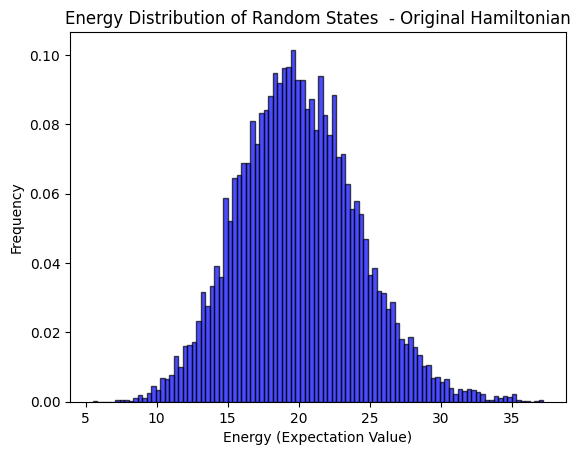

In [13]:

from qiskit.quantum_info import SparsePauliOp, random_statevector

H = original_hamiltonian_spo

# Number of random states
num_samples = 10000
num_bins = 100
energies = []

# Generate random states and compute expectation values
for _ in range(num_samples):
    psi = random_statevector(2**H.num_qubits)  # Generate a random state
    E = psi.expectation_value(H)  # Compute expectation value
    energies.append(np.real(E))  # Store only real part

# Create histogram
plt.hist(energies, bins=num_bins, density=True, alpha=0.7, color="blue", edgecolor="black")

# Plot formatting
plt.xlabel("Energy (Expectation Value)")
plt.ylabel("Frequency")
plt.title("Energy Distribution of Random States  - Original Hamiltonian")
plt.show()

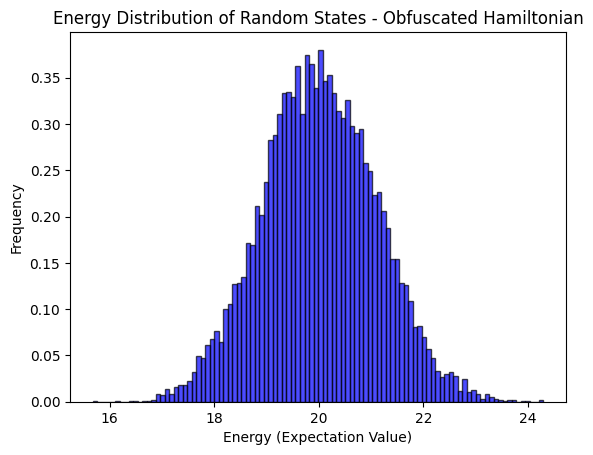

In [14]:

H = co_hamiltonian_spo

# Number of random states
num_samples = 10000
num_bins = 100
energies = []

# Generate random states and compute expectation values
for _ in range(num_samples):
    psi = random_statevector(2**H.num_qubits)  # Generate a random state
    E = psi.expectation_value(H)  # Compute expectation value
    energies.append(np.real(E))  # Store only real part

# Create histogram
plt.hist(energies, bins=num_bins, density=True, alpha=0.7, color="blue", edgecolor="black")

# Plot formatting
plt.xlabel("Energy (Expectation Value)")
plt.ylabel("Frequency")
plt.title("Energy Distribution of Random States - Obfuscated Hamiltonian")
plt.show()


---
---
### Generate Full Spectrum of Eigenvalues for Both Hamiltonians

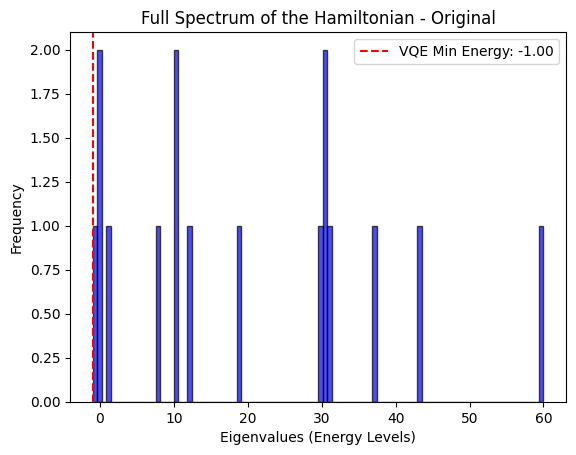

Full Spectrum: [-1.00000000e+00 -3.85157684e-01 -7.57532341e-34  1.00000000e+00
  7.86447296e+00  1.00000000e+01  1.03851577e+01  1.18348507e+01
  1.89172453e+01  3.00000000e+01  3.01355270e+01  3.01651493e+01
  3.10827547e+01  3.70000000e+01  4.30000000e+01  6.00000000e+01]
Lowest Energy Found by VQE: -0.9999999999999986


In [18]:

hamiltonian = original_hamiltonian_spo

# Convert the Hamiltonian to a matrix
H_matrix = hamiltonian.to_matrix()

# Compute eigenvalues (spectrum)
eigenvalues = np.linalg.eigvalsh(H_matrix)

# Plot histogram of eigenvalues (spectrum)
plt.hist(eigenvalues, bins=num_bins, alpha=0.7, color="blue", edgecolor="black")

# Add labels and title
plt.xlabel("Eigenvalues (Energy Levels)")
plt.ylabel("Frequency")
plt.title("Full Spectrum of the Hamiltonian - Original")

# Mark the VQE ground state
vqe_ground_state = min(eigenvalues)  # The lowest eigenvalue found
plt.axvline(vqe_ground_state, color='red', linestyle='dashed', label=f"VQE Min Energy: {vqe_ground_state:.2f}")

plt.legend()
plt.show()

# Print eigenvalues
print("Full Spectrum:", eigenvalues)
print(f"Lowest Energy Found by VQE: {vqe_ground_state}")


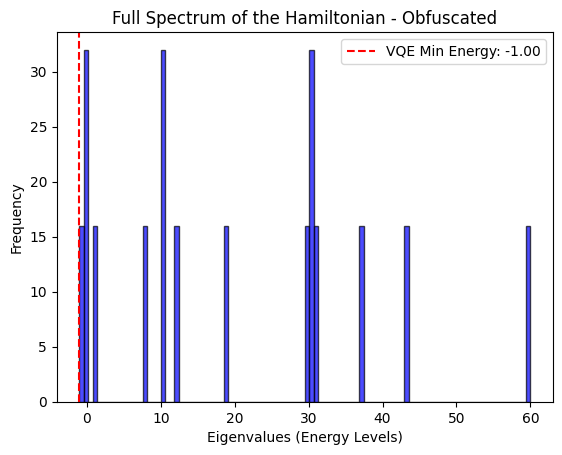

Full Spectrum: [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01
 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01
 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01
 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01 -3.85157684e-01
 -5.63595775e-14 -1.72215772e-14 -1.30355375e-14 -8.01921581e-15
 -4.96627170e-15 -2.57294203e-15 -2.46949805e-15  4.80093910e-15
  5.52116104e-15  1.11316647e-14  1.14395486e-14  1.15219282e-14
  2.00465524e-14  3.05156283e-14  4.00088931e-14  7.44994583e-14
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.000000

In [19]:

hamiltonian = co_hamiltonian_spo

# Convert the Hamiltonian to a matrix
H_matrix = hamiltonian.to_matrix()

# Compute eigenvalues (spectrum)
eigenvalues = np.linalg.eigvalsh(H_matrix)

# Plot histogram of eigenvalues (spectrum)
plt.hist(eigenvalues, bins=num_bins, alpha=0.7, color="blue", edgecolor="black")

# Add labels and title
plt.xlabel("Eigenvalues (Energy Levels)")
plt.ylabel("Frequency")
plt.title("Full Spectrum of the Hamiltonian - Obfuscated")

# Mark the VQE ground state
vqe_ground_state = min(eigenvalues)  # The lowest eigenvalue found
plt.axvline(vqe_ground_state, color='red', linestyle='dashed', label=f"VQE Min Energy: {vqe_ground_state:.2f}")

plt.legend()
plt.show()

# Print eigenvalues
print("Full Spectrum:", eigenvalues)
print(f"Lowest Energy Found by VQE: {vqe_ground_state}")
